这一节我们使用 sklearn 自带的鸢尾花数据集来实现 kNN 算法，和前面一样，我们只取数据集中的两个维度：

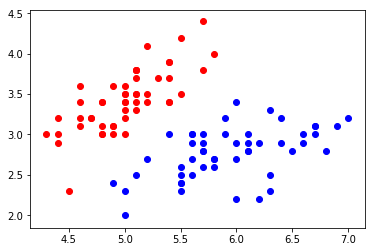

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris();

X = iris.data
y = iris.target

X = X[y < 2, :2]
y = y[y < 2]

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.show()

使用 sklearn 的 kNN 算法和 sklearn 的其他算法流程是一样的：首先定义分类器（在这里分类器为 `KNeighborsClassifier`），然后通过 `fit` 训练数据得到模型，最后通过 `predict` 对新的样本进行预测。

In [3]:
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=6)
kNN.fit(X, y)
results = kNN.predict([[6,2], [4, 3]])
print(results)

[1 0]


上面对 (6,2) 和 (4,3) 两个样本进行预测，可以看到预测结果是正确的。

### 其他实例

在 Peter Harrington 的《机器学习实战》的第二章，还介绍了很多使用 kNN 解决现实问题的例子，譬如：

1. 电影分类：根据电影中出现的打斗镜头数和接吻镜头数判断电影的类别

![](../../images/knn-movie.png)

2. 海伦约会：根据对方每年的飞行里程公里数、每周玩游戏所花费的小时数、每周吃掉的零食的斤数来判断对方是不是自己喜欢的类型

![](../../images/knn-date.jpg)

3. 手写数字识别

可以参考这里：https://cuijiahua.com/blog/2017/11/ml_1_knn.html

### 归一化

在 kNN 算法中，还有一点需要特别注意，由于大多数时候我们都是使用欧式距离来作为距离度量方法，而欧氏距离公式会极大地受到数值大小的影响，比如上面海伦约会的例子中，两个人的飞行里程可能很容易就相差2000，但吃掉的零食斤数最多可能也就差10，这样算出来的距离就几乎只受飞行里程影响，而对于海伦来说，3个特征是同等重要的。为了解决这个问题，我们需要对这三个特征的特征值进行 **归一化** （Normalization）处理，使得它们的取值范围都落在0到1之间。

$$
x_i := \frac{x_i-min(x_i)}{max(x_i)-min(x_i)}
$$